In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetic_data_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100244 non-null  int64 
 1   patient_nbr               100244 non-null  int64 
 2   race                      100244 non-null  object
 3   gender                    100244 non-null  object
 4   age                       100244 non-null  object
 5   admission_type_id         100244 non-null  int64 
 6   discharge_disposition_id  100244 non-null  int64 
 7   admission_source_id       100244 non-null  int64 
 8   time_in_hospital          100244 non-null  int64 
 9   num_lab_procedures        100244 non-null  int64 
 10  num_procedures            100244 non-null  int64 
 11  num_medications           100244 non-null  int64 
 12  number_outpatient         100244 non-null  int64 
 13  number_emergency          100244 non-null  int64 
 14  numb

In [4]:
from sklearn.preprocessing import OrdinalEncoder

str_col = df.select_dtypes(include='object').columns.tolist()
# str_col.remove('readmitted')

print(str_col)

enc = OrdinalEncoder()
df[str_col] = enc.fit_transform(df[str_col])

df

['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,2.0,0.0,1.0,1,1,7,3,59,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,64410,86047875,0.0,0.0,2.0,1,1,7,2,11,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,500364,82442376,2.0,1.0,3.0,1,1,7,2,44,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,16680,42519267,2.0,1.0,4.0,1,1,7,1,51,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,35754,82637451,2.0,1.0,5.0,2,1,2,3,31,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100239,443847548,100162476,0.0,1.0,7.0,1,3,7,3,51,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
100240,443847782,74694222,0.0,0.0,8.0,1,4,5,5,33,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
100241,443854148,41088789,2.0,1.0,7.0,1,1,7,1,53,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
100242,443857166,31693671,2.0,0.0,8.0,2,3,7,10,45,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [5]:
features = df.drop('readmitted', axis=1)
target = df['readmitted']

In [6]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.20)
selector.fit_transform(df[df.columns.difference(['readmitted'])])

df = df[df.columns[selector.get_support(indices=True)]]
df['target'] = target

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\2858103934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = target


In [8]:
# df['target'] = target
df['target'] = df['target'].astype(str)

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\2316022415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype(str)


In [9]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['target'] = label_enc.fit_transform(df['target'])

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\710623353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = label_enc.fit_transform(df['target'])


In [10]:
df.to_csv('cleaned_data.csv', index=False)

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
corr = X.corr()


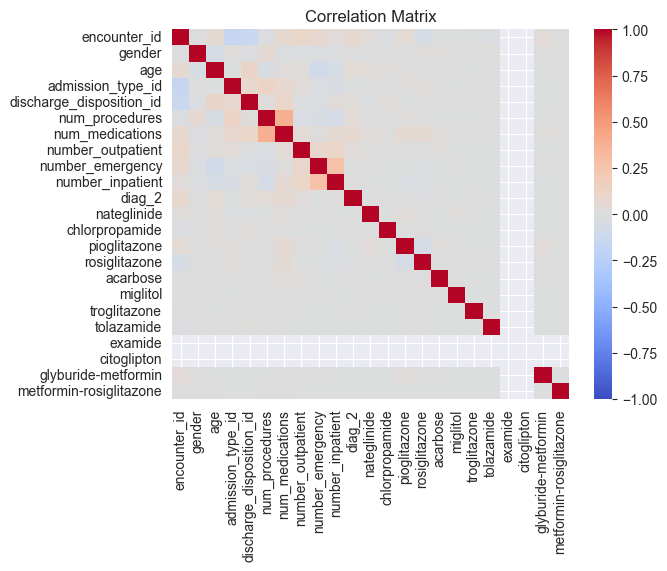

In [13]:
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.target.value_counts()

target
0    53821
1    46423
Name: count, dtype: int64

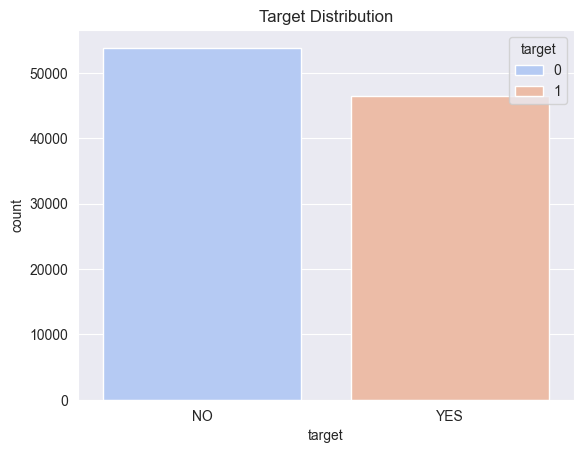

In [16]:
# plt.show()

sns.countplot(x='target', data=df, palette='coolwarm',hue='target')
plt.title('Target Distribution')
plt.xticks([0, 1], ['NO', 'YES'])
plt.show()

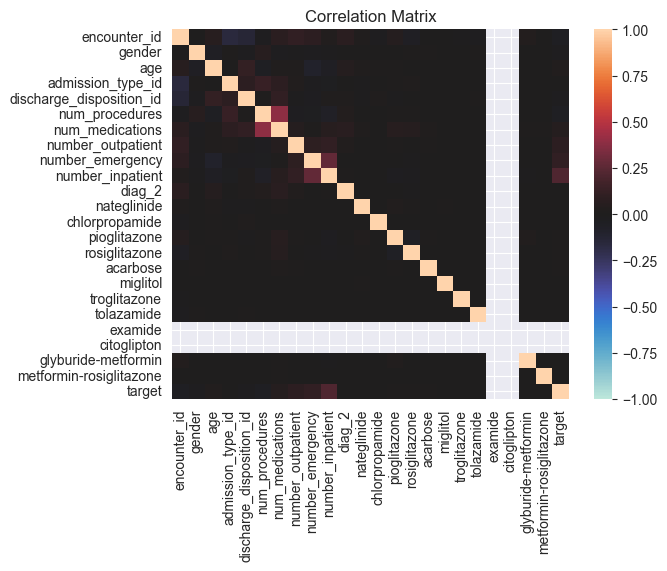

In [17]:
Correlation = df.corr()

sns.heatmap(Correlation, cmap='icefire', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()
